### Conjunto de entrenamiento y de testing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('../datasets/customer-churn-model/Customer Churn Model.txt')
data.sample(4)

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
2673,ND,180,415,369-1929,no,no,0,224.9,105,38.23,...,101,21.25,216.1,73,9.72,6.7,5,1.81,3,True.
2598,TN,196,415,340-8291,no,no,0,133.1,80,22.63,...,120,17.55,221.6,96,9.97,10.3,8,2.78,1,False.
647,ME,88,415,420-5179,no,no,0,192.0,91,32.64,...,127,10.85,155.6,125,7.00,7.5,5,2.03,1,False.
1064,WY,185,415,405-7904,yes,yes,30,154.1,114,26.20,...,106,10.09,258.4,105,11.63,12.9,3,3.48,2,False.


### Dividir usando la distribución normal

(array([  7.,  38., 187., 496., 825., 918., 556., 246.,  51.,   9.]),
 array([-3.54355225, -2.85015976, -2.15676727, -1.46337477, -0.76998228,
        -0.07658978,  0.61680271,  1.31019521,  2.0035877 ,  2.6969802 ,
         3.39037269]),
 <BarContainer object of 10 artists>)

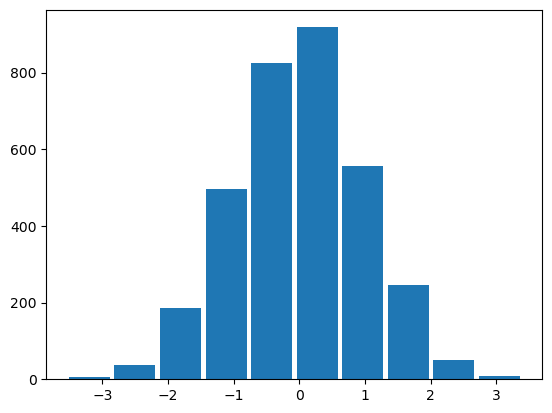

In [3]:
a = np.random.randn(len(data))
plt.hist(a, rwidth=0.9)

In [7]:
check = (a<0.8)

training = data[check]
testing = data[~check]

### Dividir usando sklearn

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
train, test = train_test_split(data, test_size=0.2)

### Dividir usando función shuffle

In [7]:
from sklearn.utils import shuffle

In [8]:
data = shuffle(data)

In [9]:
cut_id = int(0.8*len(data))
training = data[:cut_id]
testing = data[cut_id+1:]